In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('Apple and Microsoft DATA.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume,News,Company,Stock
0,12/1/2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,Apple,AAPL
1,12/4/2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...,Apple,AAPL
2,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...,Apple,AAPL
3,12/7/2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De...",Apple,AAPL
4,12/8/2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"Homebuilders, and Worries Over Jobs, Lead a De...",Apple,AAPL
...,...,...,...,...,...,...,...,...,...,...
3659,11/14/2016,59.020000,59.080002,57.279999,58.119999,58.119999,41328400,"Just How Powerful Was the ‘Mule Lobby’? (Yes, ...",Microsoft,MSFT
3660,11/15/2016,58.330002,59.490002,58.320000,58.869999,58.869999,35904100,Rising Oil Prices Lead to Market Gains : Bench...,Microsoft,MSFT
3661,11/18/2016,60.779999,61.139999,60.299999,60.349998,60.349998,27686300,L.G.B.T. Gamers Huddle for a Postelection Real...,Microsoft,MSFT
3662,11/22/2016,60.980000,61.259998,60.810001,61.119999,61.119999,23206700,"Donald Trump, Japan, Mosul: Your Wednesday Bri...",Microsoft,MSFT


In [42]:
import pandas as pd
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Functie pentru procesarea/curatarea datelor

def preprocess_text(text):
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Aplicarea functiei la setul de date
data['News'] = data['News'].apply(preprocess_text)


print(data.head())


        Date       Open       High        Low      Close  Adj Close  \
0  12/1/2006  13.114285  13.190000  12.871428  91.320000  13.045714   
1  12/4/2006  13.125714  13.150000  12.928572  91.120003  13.017143   
2  12/6/2006  12.948571  13.055715  12.810000  89.830002  12.832857   
3  12/7/2006  12.861428  12.928572  12.414286  87.040001  12.434286   
4  12/8/2006  12.461429  12.770000  12.428572  88.259995  12.608571   

      Volume                                               News Company Stock  
0  198769900  tonight 8 pm tlc ashley judd youthaids confron...   Apple  AAPL  
1  177384200  housing price broadest government measure hous...   Apple  AAPL  
2  159546100  honoring rw apple word food 1000 rw apple admi...   Apple  AAPL  
3  251206900  homebuilder worry job lead decline stock fell ...   Apple  AAPL  
4  196069300  homebuilder worry job lead decline stock fell ...   Apple  AAPL  


In [44]:

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [45]:


analyzer = SentimentIntensityAnalyzer()


# Functie care analizeaza sentimentul

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# Aplicarea functiei la setul de date

data['sentiment'] = df['News'].apply(get_sentiment)

data

,Date,Open,High,Low,Close,Adj Close,Volume,News,Company,Stock,sentiment
0,12/1/2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,tonight 8 pm tlc ashley judd youthaids confron...,Apple,AAPL,1
1,12/4/2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,housing price broadest government measure hous...,Apple,AAPL,1
2,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,honoring rw apple word food 1000 rw apple admi...,Apple,AAPL,1
3,12/7/2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1
4,12/8/2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1
...,...,...,...,...,...,...,...,...,...,...,...
3659,11/14/2016,59.020000,59.080002,57.279999,58.119999,58.119999,41328400,powerful mule lobby yes one host stephen j dub...,Microsoft,MSFT,1
3660,11/15/2016,58.330002,59.490002,58.320000,58.869999,58.869999,35904100,rising oil price lead market gain benchmark un...,Microsoft,MSFT,1
3661,11/18/2016,60.779999,61.139999,60.299999,60.349998,60.349998,27686300,lgbt gamers huddle postelection reality check ...,Microsoft,MSFT,1
3662,11/22/2016,60.980000,61.259998,60.810001,61.119999,61.119999,23206700,donald trump japan mosul wednesday briefing ne...,Microsoft,MSFT,0


In [48]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
data

,Date,Open,High,Low,Close,Adj Close,Volume,News,Company,Stock,sentiment
2006-12-01,12/1/2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,tonight 8 pm tlc ashley judd youthaids confron...,Apple,AAPL,1
2006-12-04,12/4/2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,housing price broadest government measure hous...,Apple,AAPL,1
2006-12-06,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,honoring rw apple word food 1000 rw apple admi...,Apple,AAPL,1
2006-12-07,12/7/2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1
2006-12-08,12/8/2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-14,11/14/2016,59.020000,59.080002,57.279999,58.119999,58.119999,41328400,powerful mule lobby yes one host stephen j dub...,Microsoft,MSFT,1
2016-11-15,11/15/2016,58.330002,59.490002,58.320000,58.869999,58.869999,35904100,rising oil price lead market gain benchmark un...,Microsoft,MSFT,1
2016-11-18,11/18/2016,60.779999,61.139999,60.299999,60.349998,60.349998,27686300,lgbt gamers huddle postelection reality check ...,Microsoft,MSFT,1
2016-11-22,11/22/2016,60.980000,61.259998,60.810001,61.119999,61.119999,23206700,donald trump japan mosul wednesday briefing ne...,Microsoft,MSFT,0


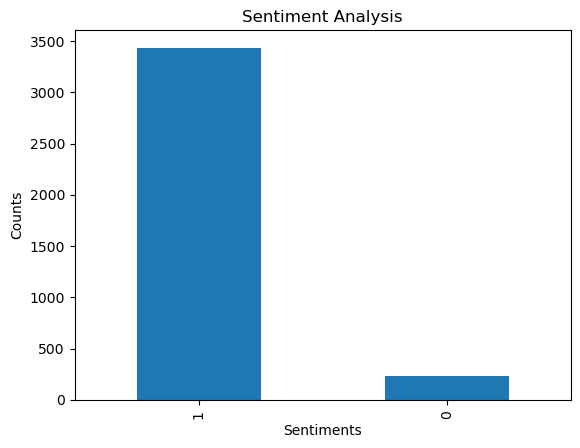

In [49]:
import matplotlib.pyplot as plt
plt.title('Sentiment Analysis')
data['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

### TextBlob

In [50]:
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
# Functie care analizeaza sentimentul
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# Aplicarea functiei la setul de date
data['Polarity'] = data['News'].apply(getPolarity)

data

,Date,Open,High,Low,Close,Adj Close,Volume,News,Company,Stock,sentiment,Polarity
2006-12-01,12/1/2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,tonight 8 pm tlc ashley judd youthaids confron...,Apple,AAPL,1,0.009269
2006-12-04,12/4/2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,housing price broadest government measure hous...,Apple,AAPL,1,0.196591
2006-12-06,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,honoring rw apple word food 1000 rw apple admi...,Apple,AAPL,1,0.032273
2006-12-07,12/7/2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1,0.029899
2006-12-08,12/8/2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1,0.106281
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-14,11/14/2016,59.020000,59.080002,57.279999,58.119999,58.119999,41328400,powerful mule lobby yes one host stephen j dub...,Microsoft,MSFT,1,0.107273
2016-11-15,11/15/2016,58.330002,59.490002,58.320000,58.869999,58.869999,35904100,rising oil price lead market gain benchmark un...,Microsoft,MSFT,1,0.012121
2016-11-18,11/18/2016,60.779999,61.139999,60.299999,60.349998,60.349998,27686300,lgbt gamers huddle postelection reality check ...,Microsoft,MSFT,1,0.000000
2016-11-22,11/22/2016,60.980000,61.259998,60.810001,61.119999,61.119999,23206700,donald trump japan mosul wednesday briefing ne...,Microsoft,MSFT,0,0.000000


In [54]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score < 0.1:
        return 'Neutral'
    else:
        return 'Positive'

data['Sentiment'] = data['Polarity'].apply(getSentiment)

data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,News,Company,Stock,sentiment,Polarity,Sentiment
2006-12-01,12/1/2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,tonight 8 pm tlc ashley judd youthaids confron...,Apple,AAPL,1,0.009269,Neutral
2006-12-04,12/4/2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,housing price broadest government measure hous...,Apple,AAPL,1,0.196591,Positive
2006-12-06,12/6/2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,honoring rw apple word food 1000 rw apple admi...,Apple,AAPL,1,0.032273,Neutral
2006-12-07,12/7/2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1,0.029899,Neutral
2006-12-08,12/8/2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,homebuilder worry job lead decline stock fell ...,Apple,AAPL,1,0.106281,Positive
2006-12-11,12/11/2006,12.700000,12.757143,12.578571,88.750000,12.678572,124945100,sale ipod itunes much sync number suggest ipod...,Apple,AAPL,1,0.165436,Positive
2006-12-13,12/13/2006,12.564285,12.724286,12.450000,89.050003,12.721429,214263000,opart identity opart seymour chwast portrays i...,Apple,AAPL,1,0.211660,Positive
2006-12-14,12/14/2006,12.721429,12.857142,12.608571,88.549995,12.650000,208082700,adam m madam kristin chenoweth us every theatr...,Apple,AAPL,1,0.170666,Positive
2006-12-15,12/15/2006,12.717143,12.745714,12.475715,87.720001,12.531428,184984800,adam m madam kristin chenoweth us every theatr...,Apple,AAPL,1,0.043690,Neutral
2006-12-18,12/18/2006,12.518572,12.571428,12.084286,85.470001,12.210000,180394200,apple delay earnings statement due option gran...,Apple,AAPL,1,-0.021694,Negative


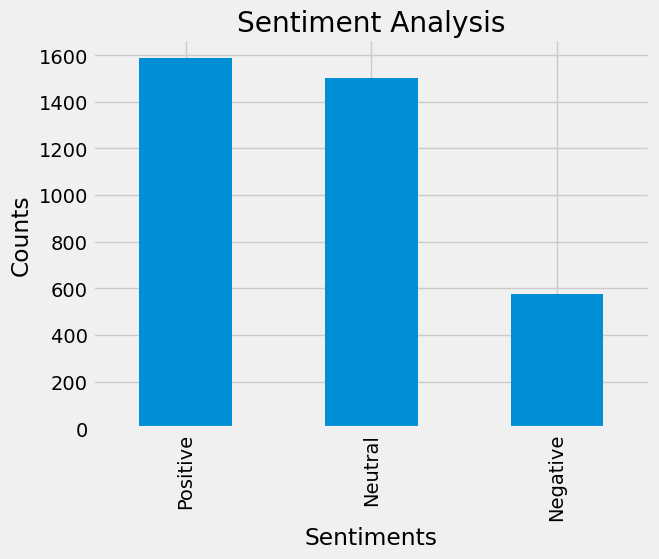

In [55]:
plt.title('Sentiment Analysis')
data['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

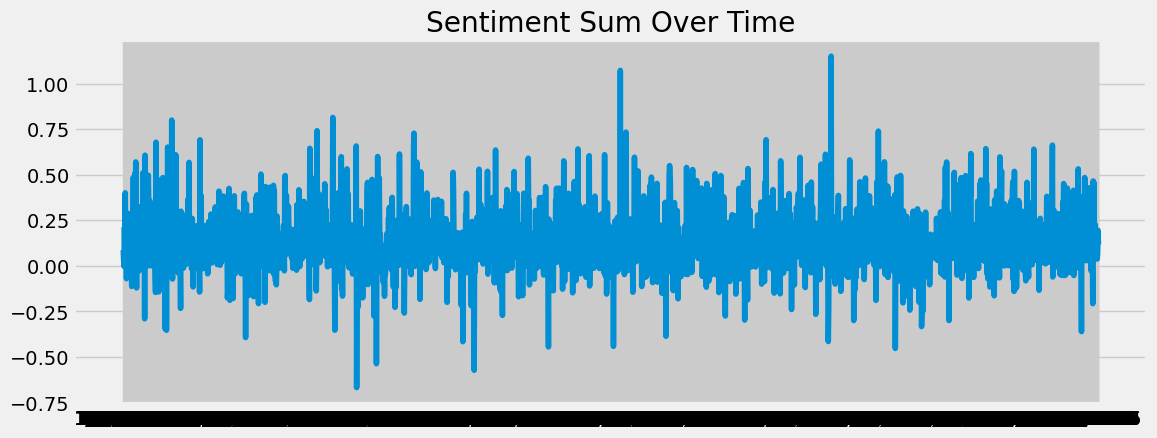

In [56]:
plt.figure(figsize=(12.33, 4.5))
plt.title('Sentiment Sum Over Time')
polarity = data.groupby(['Date']).sum()['Polarity']
plt.plot(polarity.index, polarity)

In [58]:
data.to_csv('News AM Analiza Sentiment.csv')